# Air Quality Prediction Using Neural Networks

## Step 1: Import Libraries and Load Data
### Imported essential libraries like Pandas, Numpy, Matplotlib, Seaborn, and Scikit-learn.

In [3]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

## Step 2: Data Loading and Inspection
### Loaded the dataset and performed initial inspections (data.head(), .info(), .shape(), .isnull().sum()).

In [5]:
# Loading the dataset using read csv
data = pd.read_csv("AirQualityData.csv")

In [6]:
data.head(20)

,date,temperature,humidity,wind_speed,wind_direction,pressure,PM2.5,CO,NO,NO2,O3,PB,PM10,SO2
0,2022-01-01,52.5,58.3,5.9,346.7,1019.0,11.4,0.5,0.019,31.5,0.036,NaN,21.0,0.2
1,2022-01-01,52.5,58.3,5.9,346.7,1019.0,11.4,0.5,0.019,28.1,0.036,NaN,21.0,0.2
2,2022-01-01,52.5,58.3,5.9,346.7,1019.0,11.4,0.5,0.019,31.5,0.036,NaN,21.0,0.2
3,2022-01-01,52.5,58.3,5.9,346.7,1019.0,11.4,0.5,0.019,28.1,0.036,NaN,21.0,0.2
4,2022-01-01,52.5,58.3,5.9,346.7,1019.0,12.1,0.5,0.019,31.5,0.036,NaN,21.0,0.2
5,2022-01-01,52.5,58.3,5.9,346.7,1019.0,12.1,0.5,0.019,28.1,0.036,NaN,21.0,0.2
6,2022-01-01,52.5,58.3,5.9,346.7,1019.0,12.1,0.5,0.019,31.5,0.036,NaN,21.0,0.2
7,2022-01-01,52.5,58.3,5.9,346.7,1019.0,12.1,0.5,0.019,28.1,0.036,NaN,21.0,0.2
8,2022-01-02,52.0,41.0,6.3,351.8,1023.9,7.0,0.6,0.017,33.7,0.036,NaN,17.0,0.2
9,2022-01-02,52.0,41.0,6.3,351.8,1023.9,7.0,0.6,0.017,30.4,0.036,NaN,17.0,0.2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7940 entries, 0 to 7939
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            7940 non-null   object 
 1   temperature     7940 non-null   float64
 2   humidity        7940 non-null   float64
 3   wind_speed      7940 non-null   float64
 4   wind_direction  7940 non-null   float64
 5   pressure        7940 non-null   float64
 6   PM2.5           7940 non-null   float64
 7   CO              7940 non-null   float64
 8   NO              7940 non-null   float64
 9   NO2             7936 non-null   float64
 10  O3              7848 non-null   float64
 11  PB              5552 non-null   float64
 12  PM10            7900 non-null   float64
 13  SO2             7836 non-null   float64
dtypes: float64(13), object(1)
memory usage: 868.6+ KB


In [8]:
data.shape

(7940, 14)

In [9]:
data.nunique()

date              365
temperature       216
humidity          256
wind_speed         95
wind_direction    316
pressure          142
PM2.5             191
CO                 14
NO                112
NO2               362
O3                 62
PB                 41
PM10               47
SO2                24
dtype: int64

In [10]:
data.isnull().sum()

date                 0
temperature          0
humidity             0
wind_speed           0
wind_direction       0
pressure             0
PM2.5                0
CO                   0
NO                   0
NO2                  4
O3                  92
PB                2388
PM10                40
SO2                104
dtype: int64

## Step 3: Handling Missing Data
### Visualized missing data using a heatmap and applied time-based linear interpolation for pollutants.

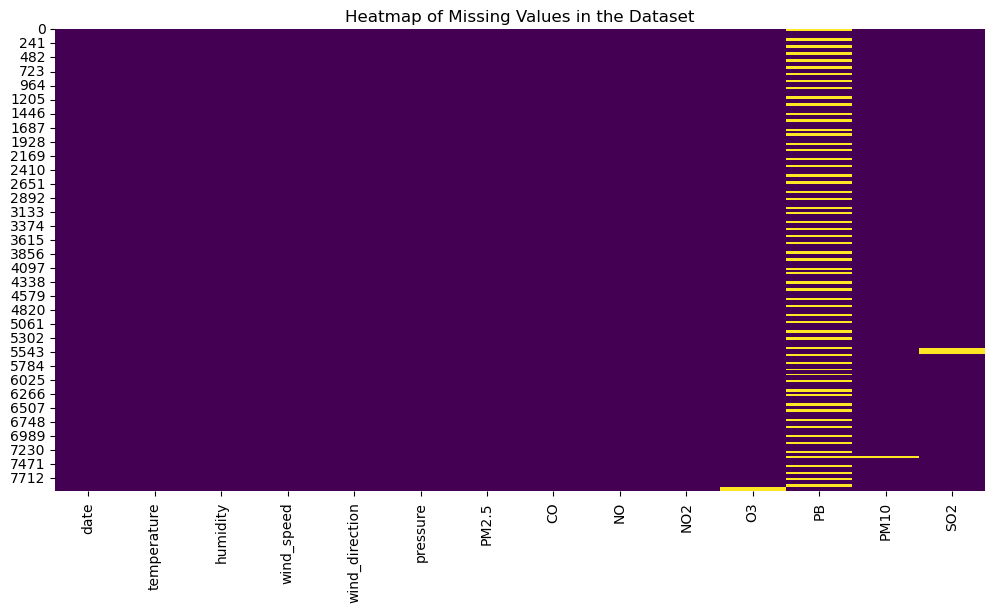

In [12]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Values in the Dataset")
plt.savefig(f"missing_values_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

In [13]:
# Parse dates for the 'date' column and set it as the index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

In [14]:
# Interpolate missing values using time-based linear interpolation
interpolate = ['NO2', 'O3', 'PM10', 'SO2', 'PB']
data[interpolate] = data[interpolate].interpolate(
    method='time', limit_direction='both'
)

In [15]:
data[interpolate].isnull().sum()

NO2     0
O3      0
PM10    0
SO2     0
PB      0
dtype: int64

In [16]:
data

,temperature,humidity,wind_speed,wind_direction,pressure,PM2.5,CO,NO,NO2,O3,PB,PM10,SO2
date,,,,,,,,,,,,,
2022-01-01,52.5,58.3,5.9,346.7,1019.0,11.4,0.5,0.019,31.5,0.036,0.01,21.0,0.2
2022-01-01,52.5,58.3,5.9,346.7,1019.0,11.4,0.5,0.019,28.1,0.036,0.01,21.0,0.2
2022-01-01,52.5,58.3,5.9,346.7,1019.0,11.4,0.5,0.019,31.5,0.036,0.01,21.0,0.2
2022-01-01,52.5,58.3,5.9,346.7,1019.0,11.4,0.5,0.019,28.1,0.036,0.01,21.0,0.2
2022-01-01,52.5,58.3,5.9,346.7,1019.0,12.1,0.5,0.019,31.5,0.036,0.01,21.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,58.1,93.6,8.8,130.2,1014.7,4.0,0.3,0.012,14.4,0.017,0.00,4.0,0.0
2022-12-31,58.1,93.6,8.8,130.2,1014.7,4.0,0.3,0.012,14.0,0.017,0.00,4.0,0.0
2022-12-31,58.1,93.6,8.8,130.2,1014.7,4.0,0.3,0.012,14.0,0.017,0.00,4.0,0.0


## Step 4: Exploratory Data Analysis (EDA)
### Visualized pollutant patterns, correlations, and trends (e.g., hourly, seasonal).

In [18]:
metrics =['temperature', 'humidity', 'wind_speed', 'pressure', 'PM2.5', 'CO', 'NO', 'NO2', 'O3', 'PM10', 'SO2', 'PB']

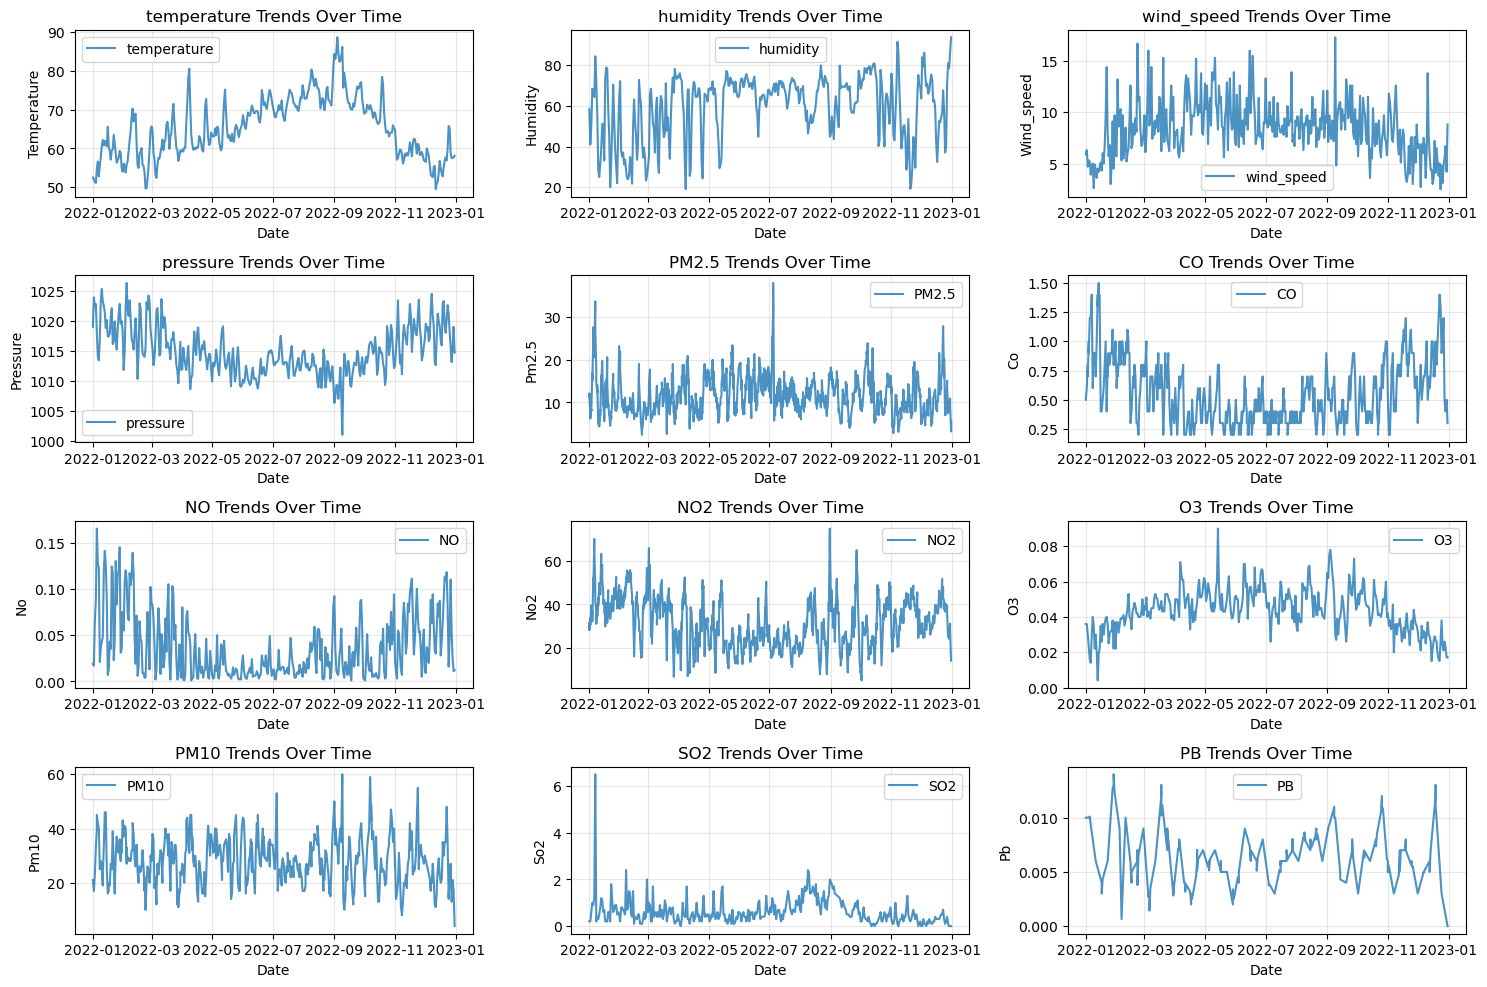

In [19]:
plt.figure(figsize=(15,12))
for i, metric in enumerate(metrics, 1):
    plt.subplot(len(metrics) // 3 + 1, 3, i)
    plt.plot(data.index, data[metric], label=metric, alpha=0.8)
    plt.title(f"{metric} Trends Over Time")
    plt.xlabel("Date")
    plt.ylabel(metric.capitalize())
    plt.grid(alpha=0.3)
    plt.legend()

plt.tight_layout()
plt.savefig(f"trends_over_time.png", dpi=300, bbox_inches='tight')
plt.show()
    

In [20]:
# Pollutant Pattern
pollutants = ['PM2.5', 'CO', 'NO', 'NO2', 'O3', 'PM10', 'SO2', 'PB']
pollutantdata = data[pollutants]

In [21]:
corr = pollutantdata.corr()

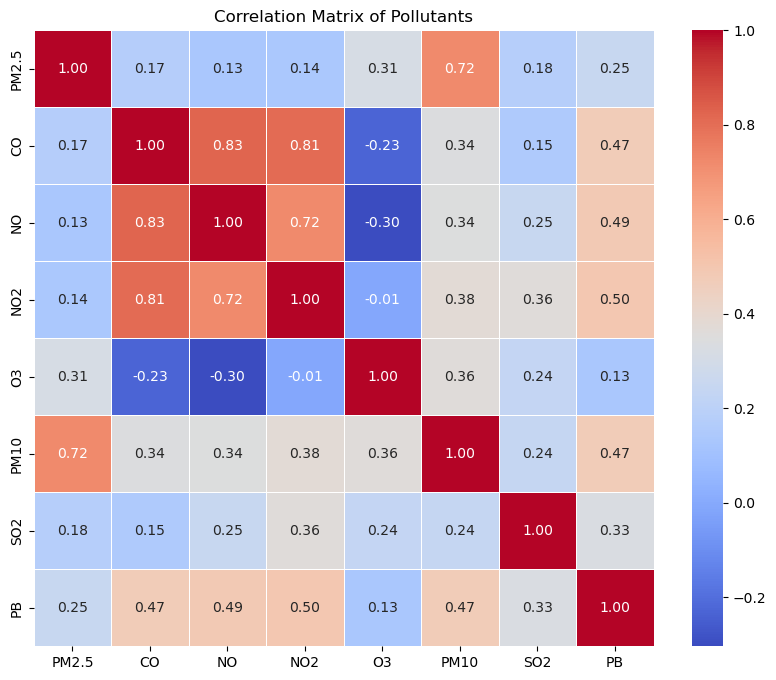

,PM2.5,CO,NO,NO2,O3,PM10,SO2,PB
PM2.5,1.000000,0.173374,0.133076,0.139205,0.312790,0.724535,0.177674,0.246850
CO,0.173374,1.000000,0.825574,0.808464,-0.231796,0.341309,0.154776,0.473744
NO,0.133076,0.825574,1.000000,0.723762,-0.303375,0.344021,0.250342,0.488198
NO2,0.139205,0.808464,0.723762,1.000000,-0.011290,0.375623,0.363303,0.497129
O3,0.312790,-0.231796,-0.303375,-0.011290,1.000000,0.360765,0.235690,0.132125
PM10,0.724535,0.341309,0.344021,0.375623,0.360765,1.000000,0.238070,0.470639
SO2,0.177674,0.154776,0.250342,0.363303,0.235690,0.238070,1.000000,0.328743
PB,0.246850,0.473744,0.488198,0.497129,0.132125,0.470639,0.328743,1.000000


In [22]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Pollutants")
plt.savefig(f"correlation_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

corr

In [23]:
# Find the most correlated pollutant pairs
unstacked = corr.unstack()
sorted_corr = unstacked.sort_values(ascending=False)

# Filter out self-correlations (correlation of 1.0)
correlated = sorted_corr[sorted_corr < 1.0].drop_duplicates()

# Display the top correlated pollutant pairs
correlated.head() 

CO    NO       0.825574
NO2   CO       0.808464
PM10  PM2.5    0.724535
NO    NO2      0.723762
NO2   PB       0.497129
dtype: float64

## Step 5: Feature Engineering
### Created lagged pollutant features (1, 6, and 24 hours). 
### Derived time-related features like weekday, hour, and season.

In [25]:
# Feature Engineering 
hours = [1, 6, 24]
for col in ['PM2.5', 'CO', 'NO', 'NO2', 'O3', 'PM10', 'SO2', 'PB']:
    for lag in hours:
        data[f"{col}_{lag}hr"] = data[col].shift(lag)

In [26]:
# Derived Time Features
data['week_day'] = data.index.dayofweek
data['hour'] = data.index.hour

In [27]:
# Define season based on month
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

data['season'] = data.index.month.map(get_season)

In [28]:
# Function to plot trends
def plot_trends(pollutant, feature, xlabel, xticks=None, xtick_labels=None):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=feature, y=pollutant, data=data)
    plt.title(f"{pollutant} Trends by {xlabel}")
    plt.xlabel(xlabel)
    plt.ylabel(f"{pollutant} Concentration")
    if xticks and xtick_labels:
        plt.xticks(ticks=xticks, labels=xtick_labels)
    plt.grid(alpha=0.3)
    plt.show()

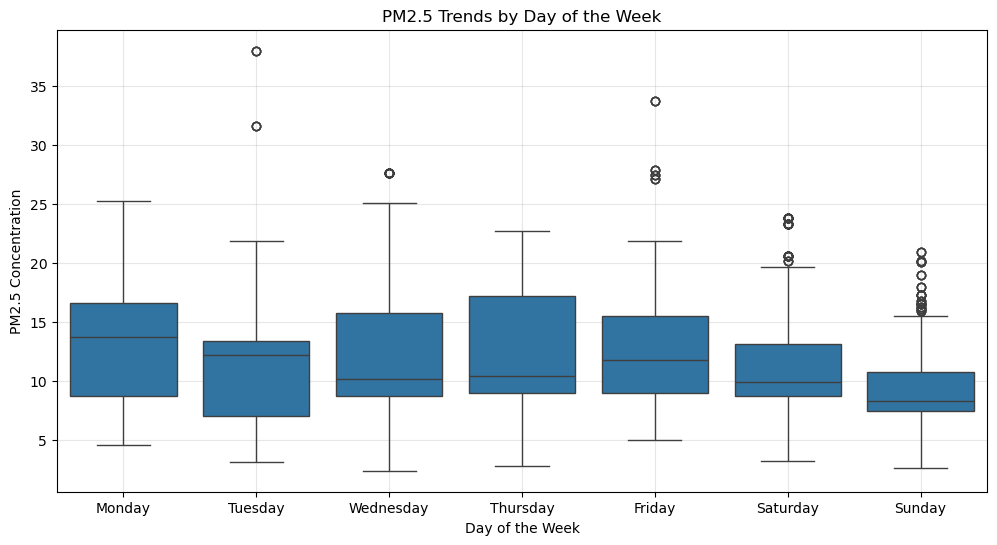

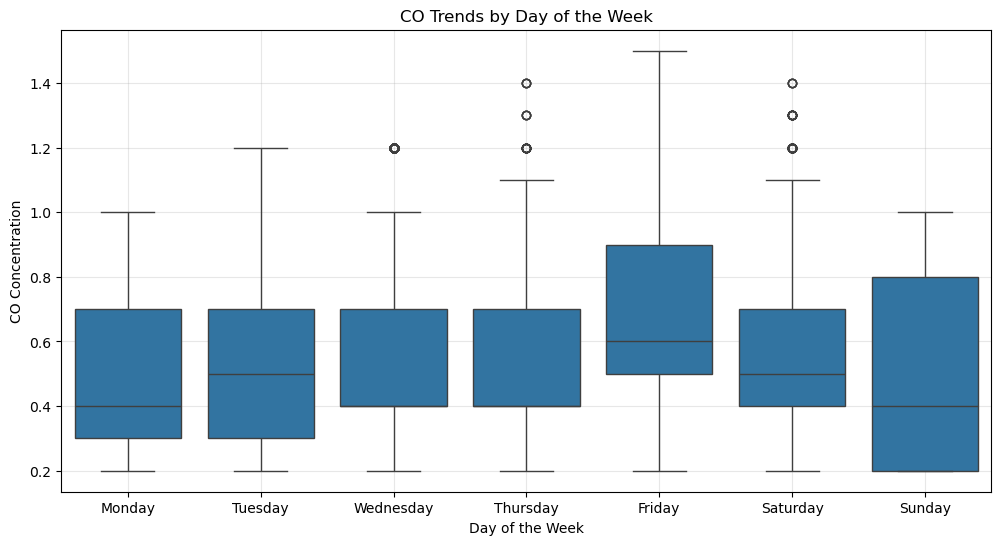

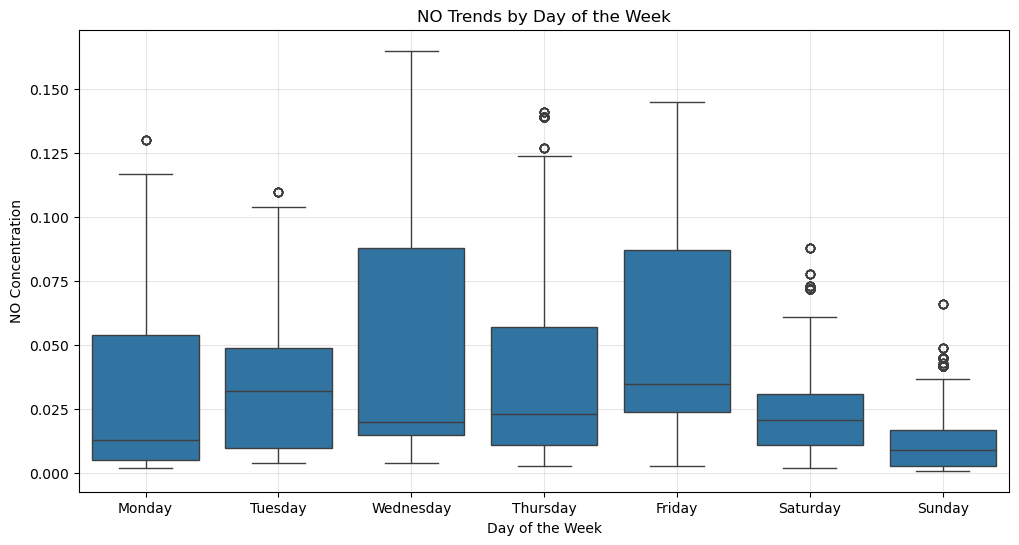

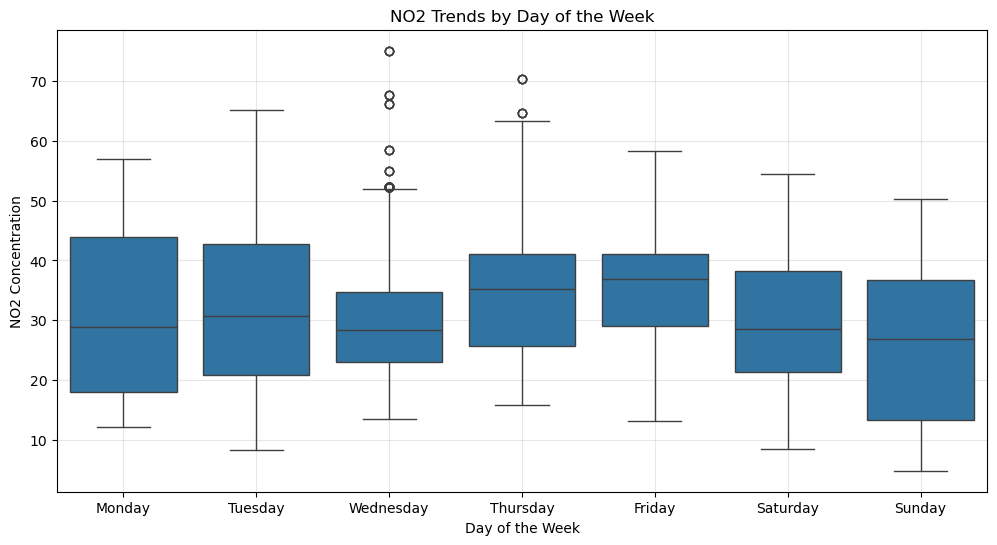

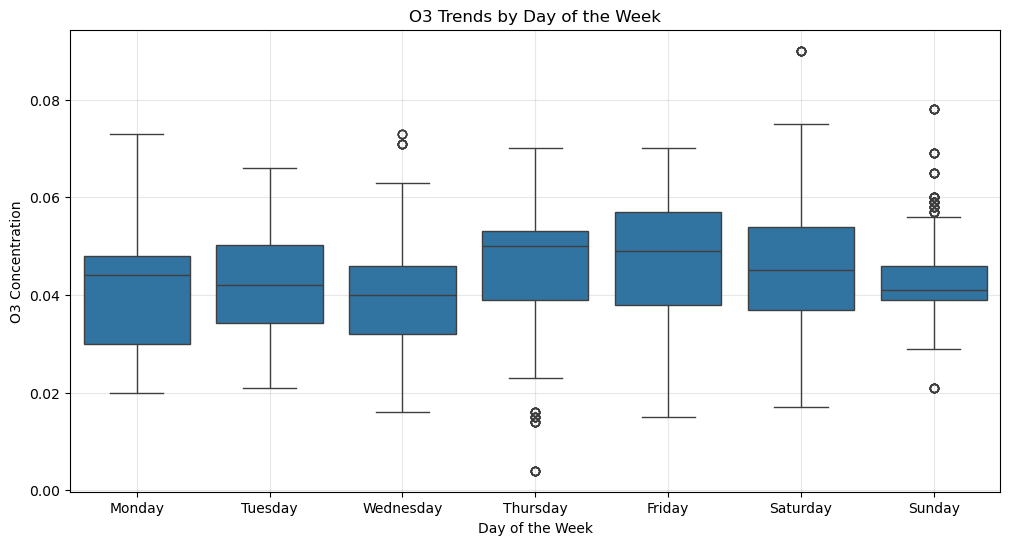

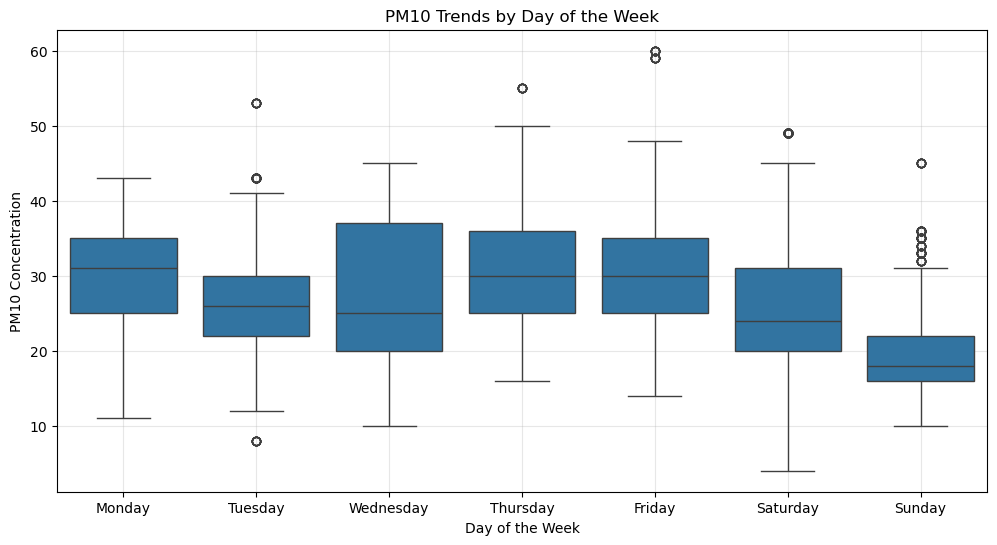

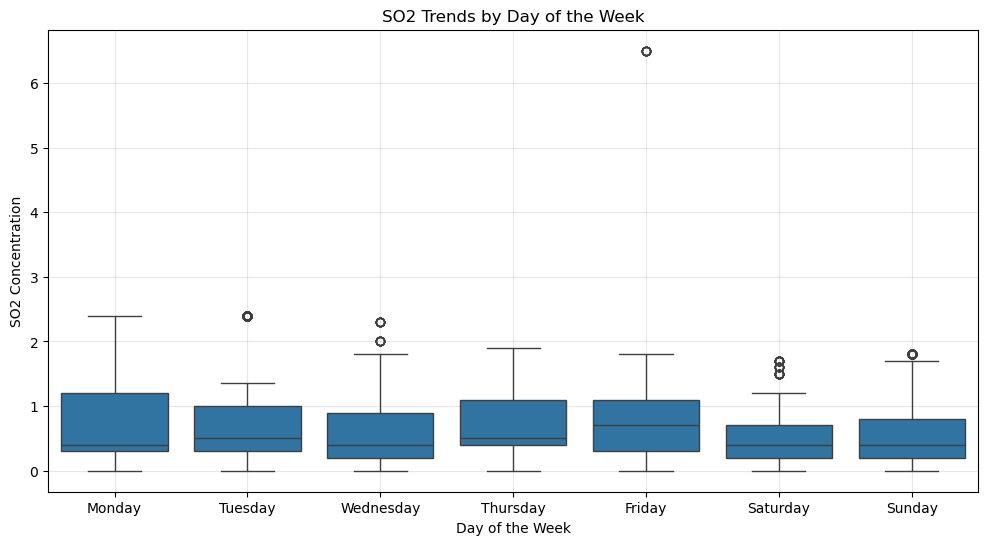

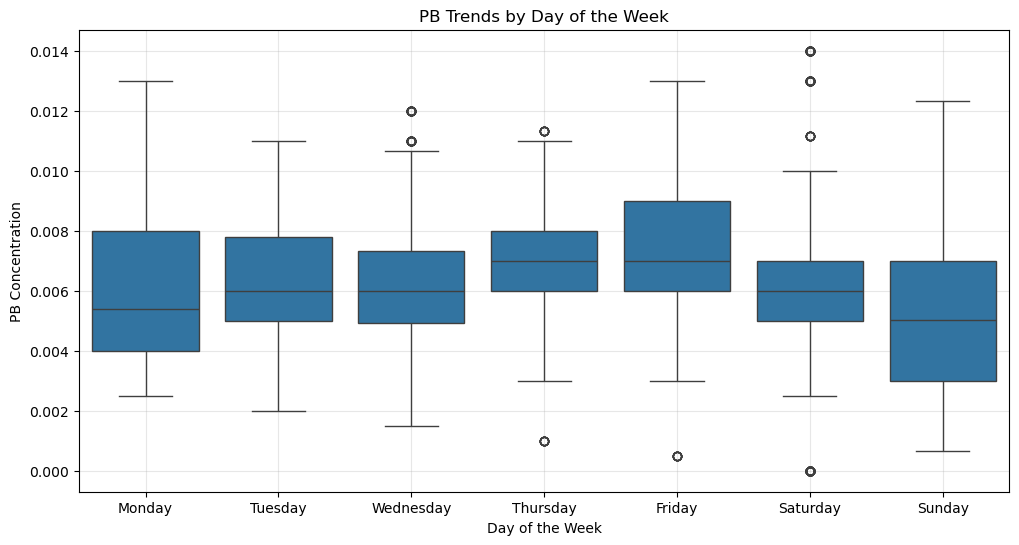

In [29]:
# Weekday trends
for pollutant in pollutants:
    plot_trends(
        pollutant=pollutant,
        feature='week_day',
        xlabel='Day of the Week',
        xticks=range(7),
        xtick_labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    )

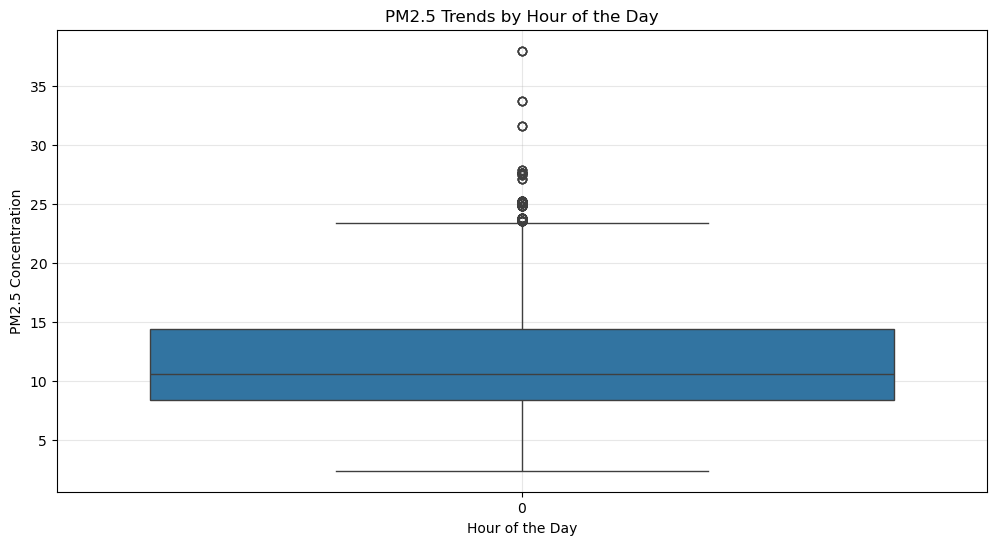

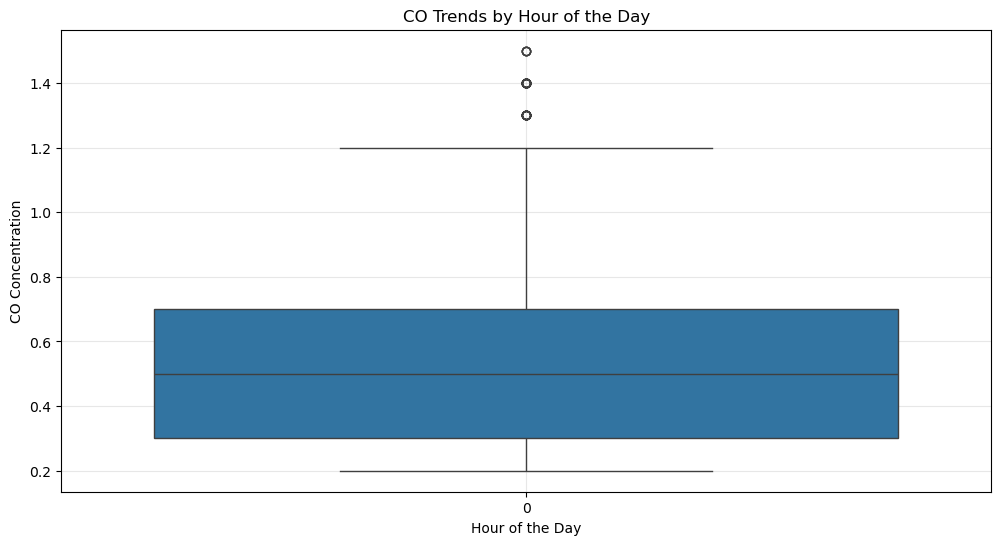

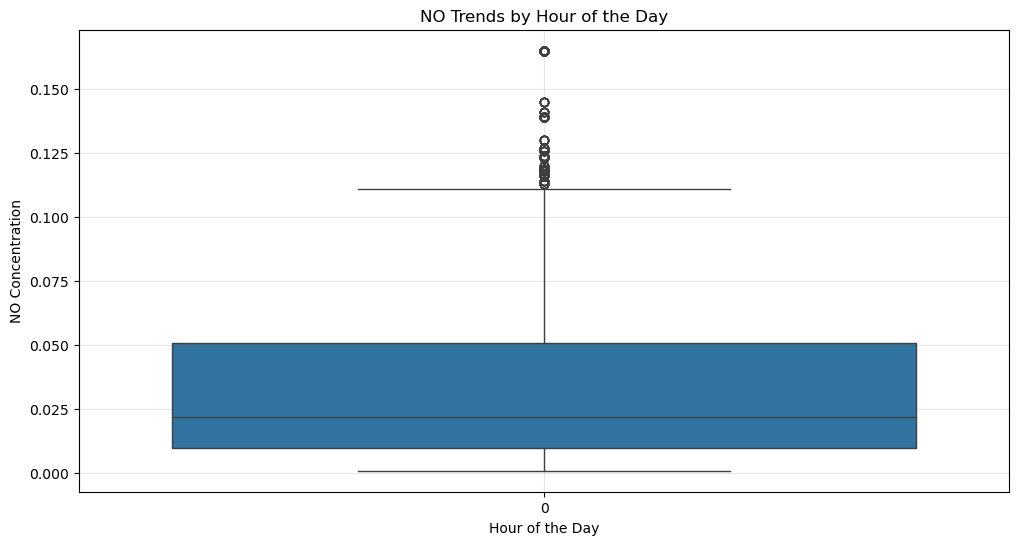

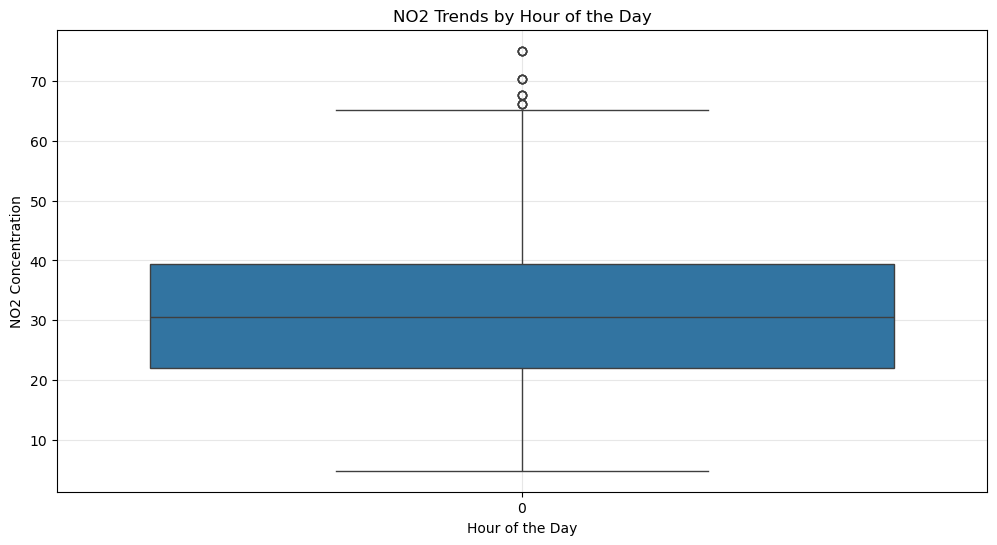

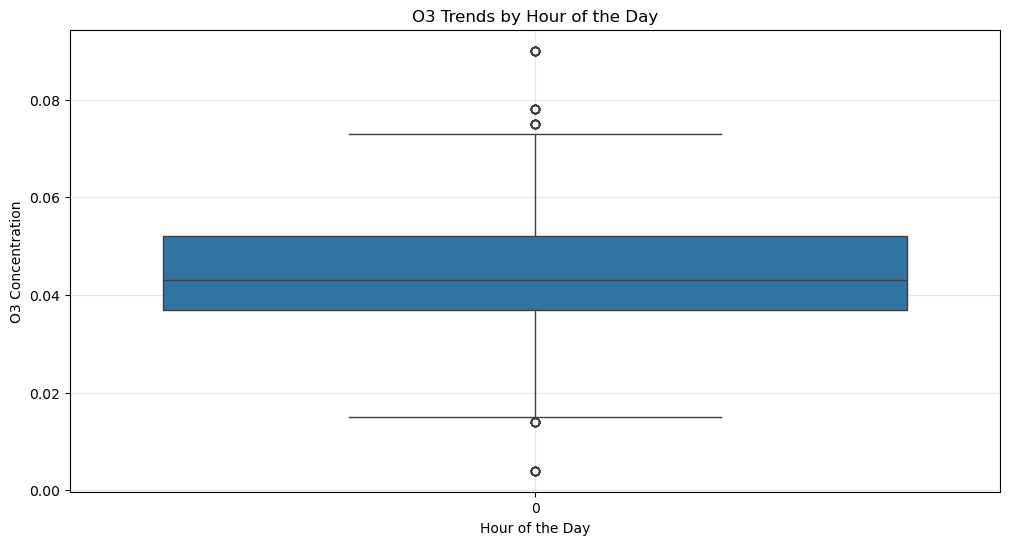

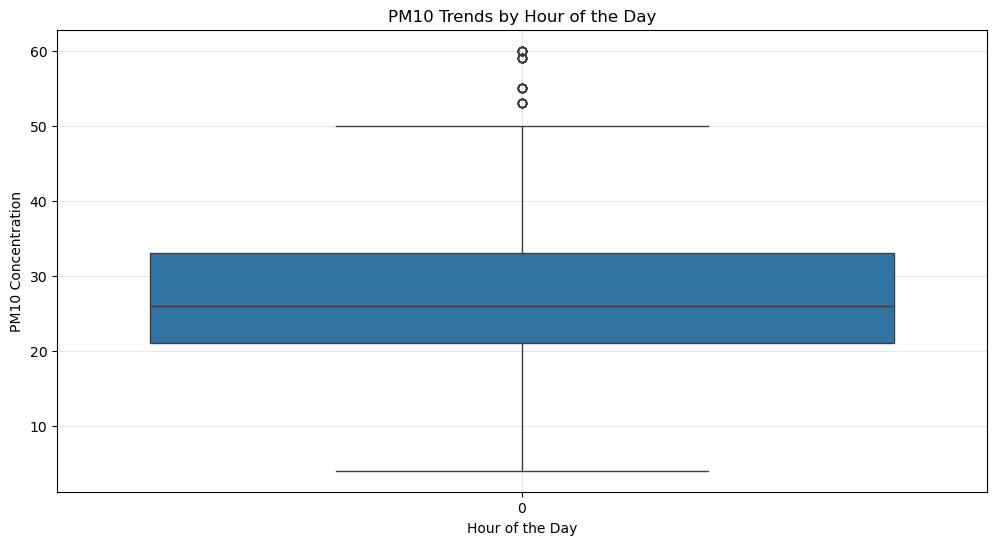

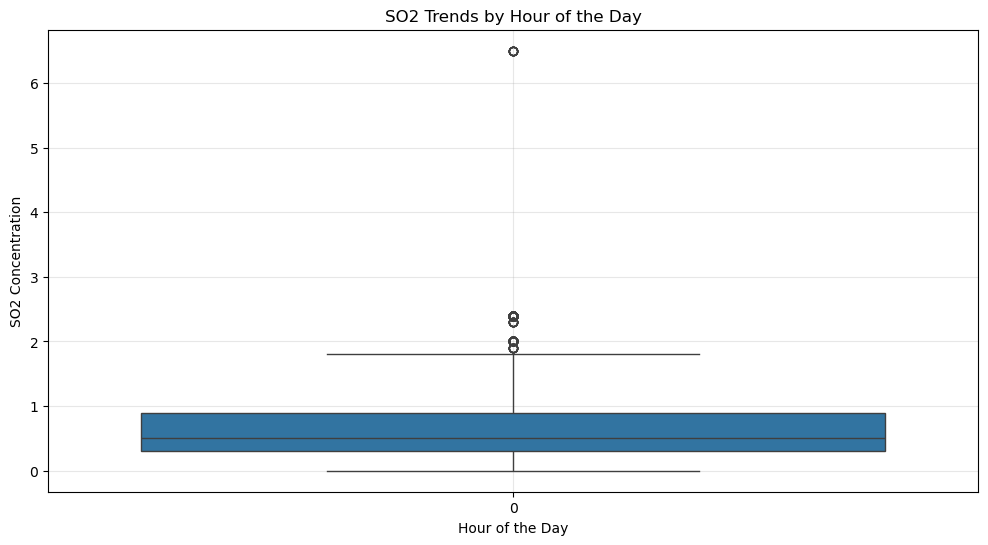

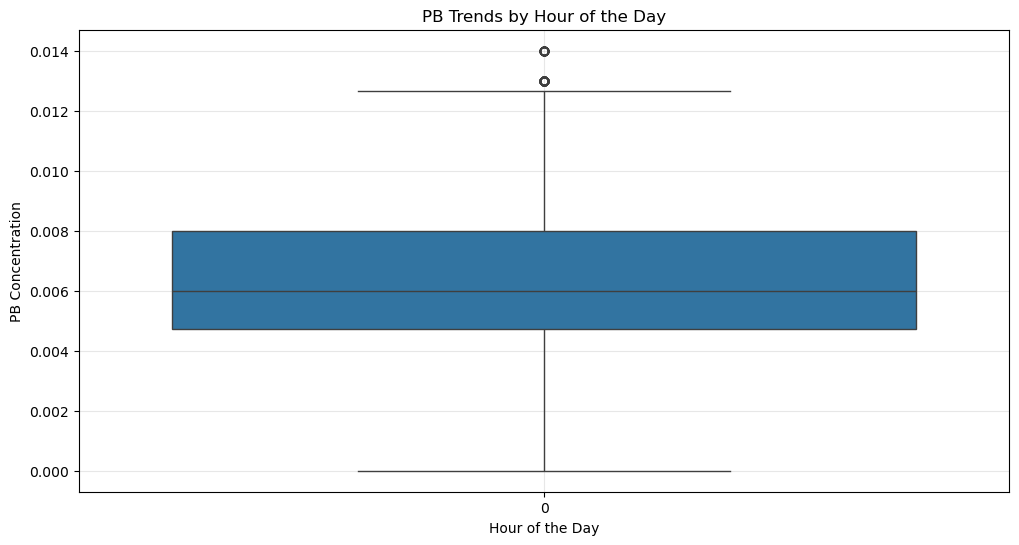

In [30]:
# Hourly trends
for pollutant in pollutants:
    plot_trends(
        pollutant=pollutant,
        feature='hour',
        xlabel='Hour of the Day'
    )

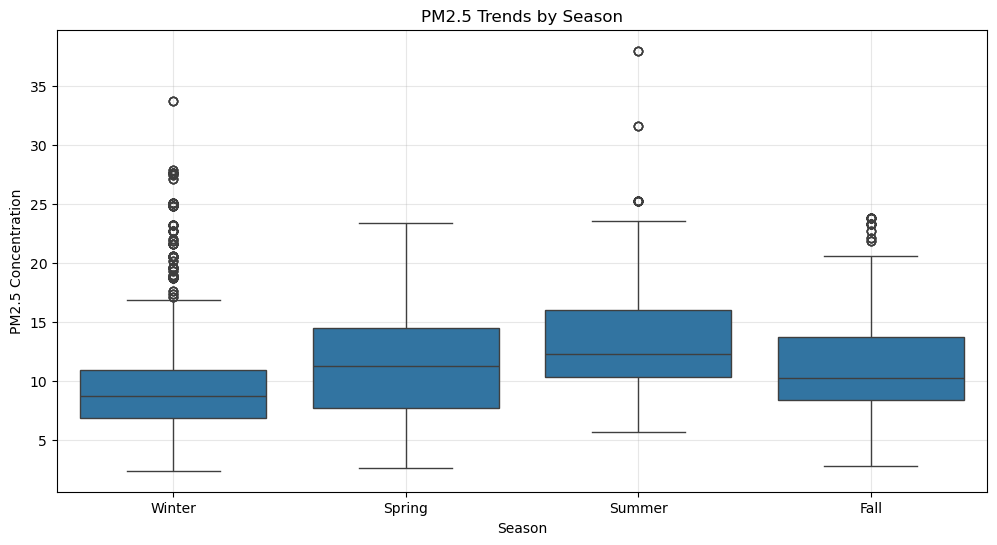

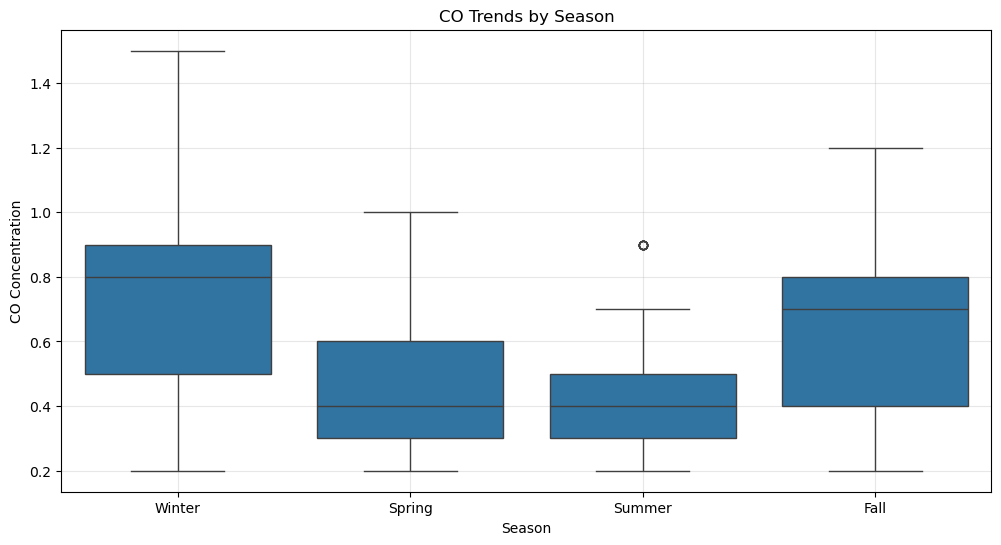

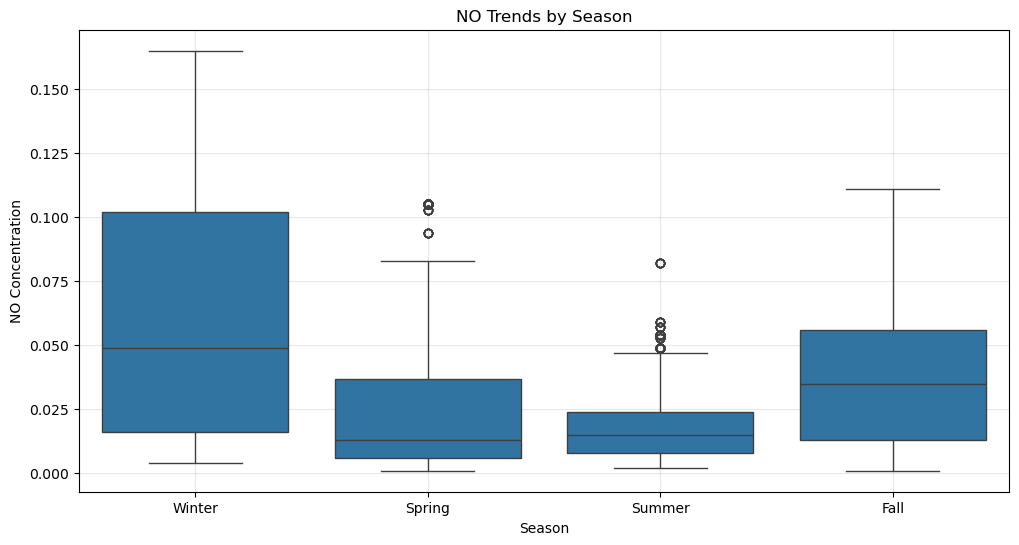

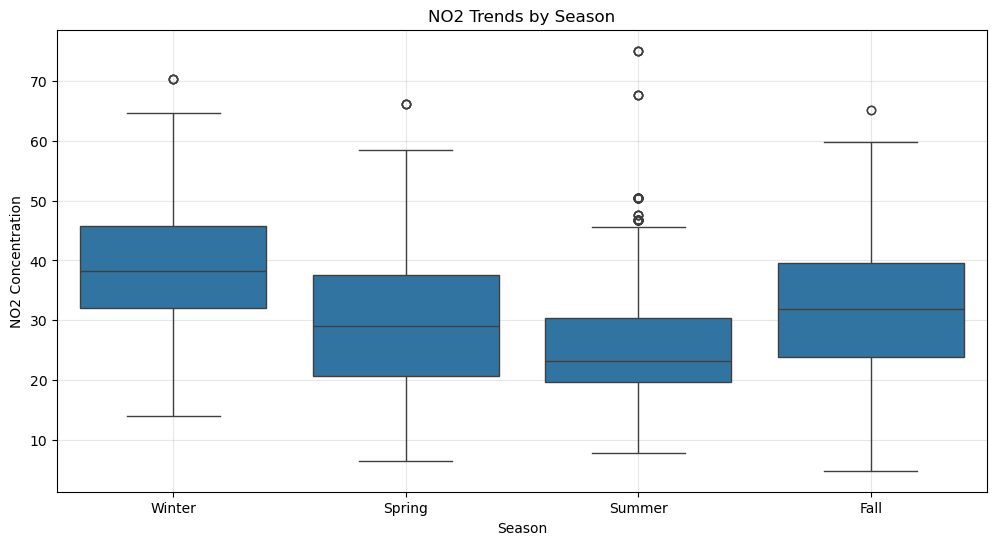

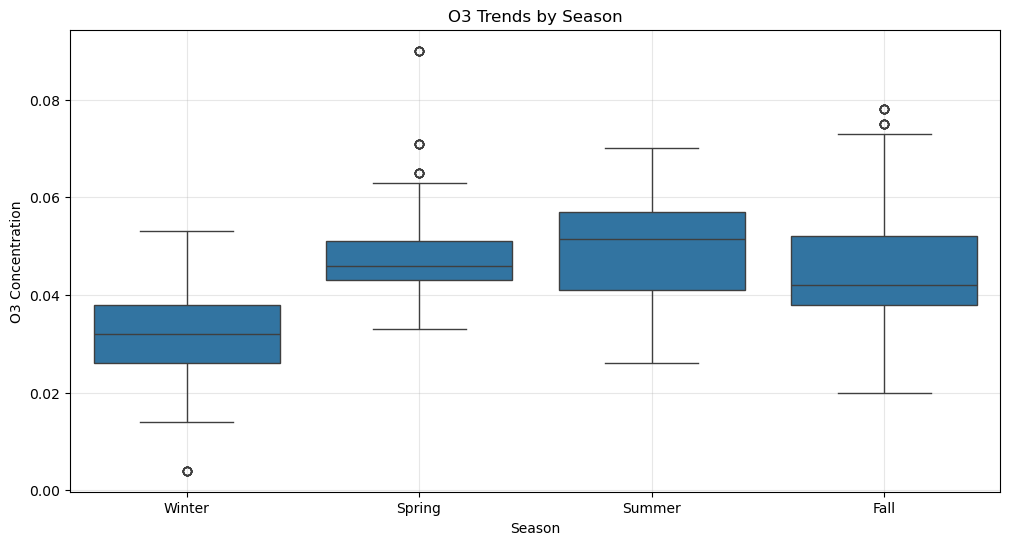

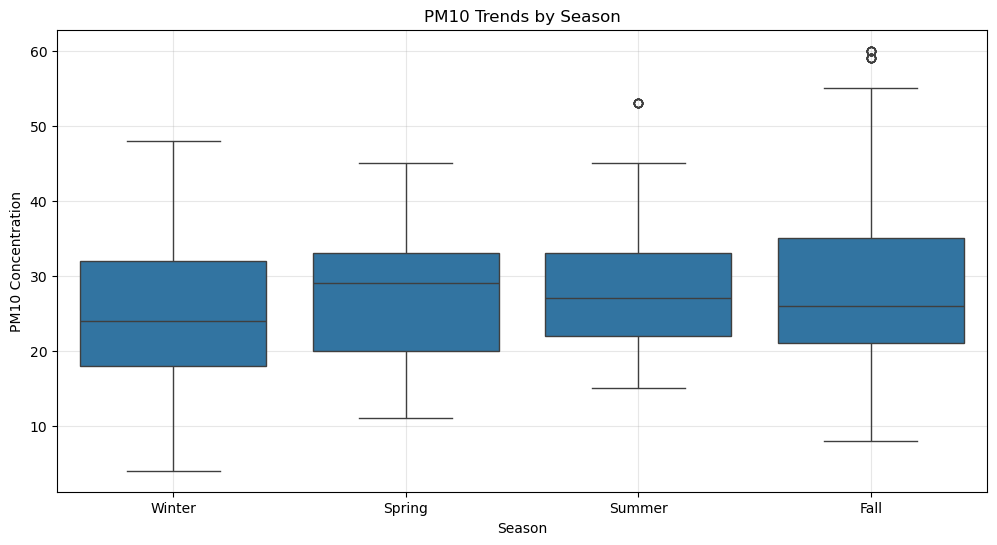

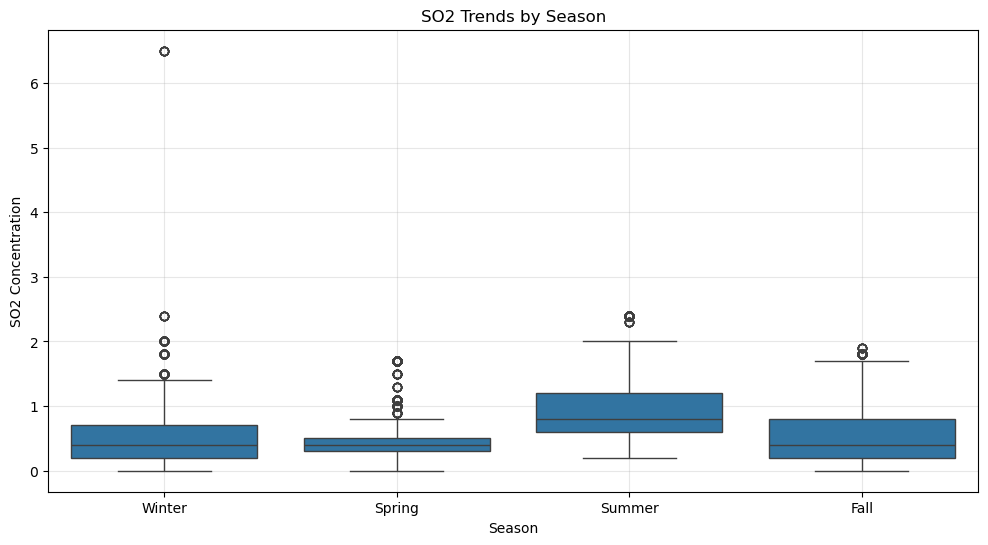

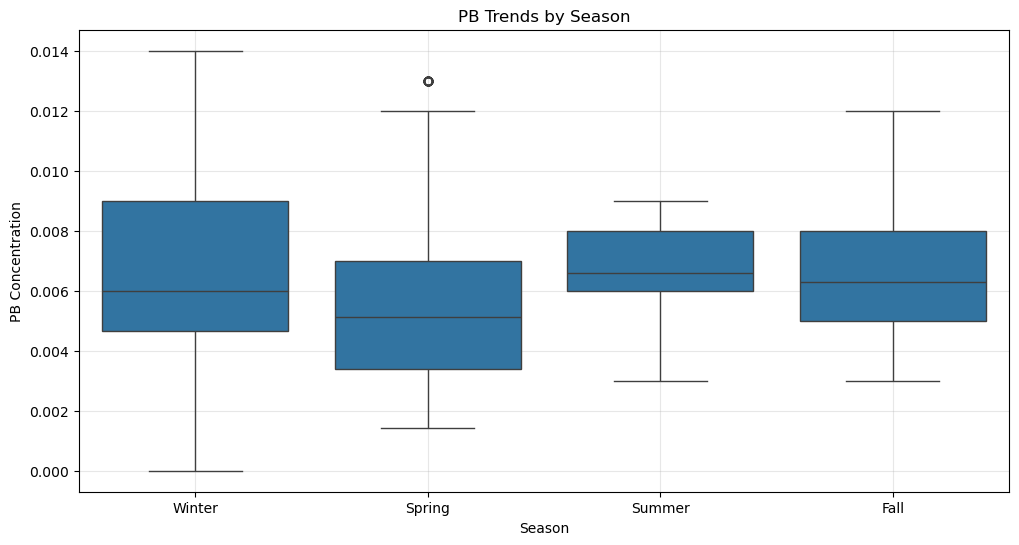

In [31]:
# Seasonal trends
for pollutant in pollutants:
    plot_trends(
        pollutant=pollutant,
        feature='season',
        xlabel='Season',
        xticks=None,
        xtick_labels=None
    )

## Step 6: Scaling and Normalization
### Applied Standard Scaling and Min-Max Scaling to numerical features.

In [33]:
numerical = data.select_dtypes(include =['float64', 'int64']).columns

In [34]:
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

In [35]:
# Applying Standard Scaling
scaler_data = pd.DataFrame(
    standard_scaler.fit_transform(data[numerical]),
    columns = numerical,
    index = data.index
)

In [36]:
# Applying Min-Max Scaling
minmax_data = pd.DataFrame(
    min_max_scaler.fit_transform(data[numerical]),
    columns = numerical,
    index = data.index
)

In [37]:
print("Standard Scaled Data (First 5 Rows):")
print(scaler_data.head())

Standard Scaled Data (First 5 Rows):
            temperature  humidity  wind_speed  wind_direction  pressure  \
date                                                                      
2022-01-01    -1.664834 -0.079702   -0.964835        1.989169  0.980237   
2022-01-01    -1.664834 -0.079702   -0.964835        1.989169  0.980237   
2022-01-01    -1.664834 -0.079702   -0.964835        1.989169  0.980237   
2022-01-01    -1.664834 -0.079702   -0.964835        1.989169  0.980237   
2022-01-01    -1.664834 -0.079702   -0.964835        1.989169  0.980237   

               PM2.5        CO        NO       NO2        O3  ...  O3_24hr  \
date                                                          ...            
2022-01-01 -0.056951 -0.172812 -0.464768  0.075460 -0.636447  ...      NaN   
2022-01-01 -0.056951 -0.172812 -0.464768 -0.215582 -0.636447  ...      NaN   
2022-01-01 -0.056951 -0.172812 -0.464768  0.075460 -0.636447  ...      NaN   
2022-01-01 -0.056951 -0.172812 -0.464768 -0.215

In [38]:
print("\nMin-Max Scaled Data (First 5 Rows):")
print(minmax_data.head())


Min-Max Scaled Data (First 5 Rows):
            temperature  humidity  wind_speed  wind_direction  pressure  \
date                                                                      
2022-01-01     0.076531  0.526174     0.22973        0.963056  0.711462   
2022-01-01     0.076531  0.526174     0.22973        0.963056  0.711462   
2022-01-01     0.076531  0.526174     0.22973        0.963056  0.711462   
2022-01-01     0.076531  0.526174     0.22973        0.963056  0.711462   
2022-01-01     0.076531  0.526174     0.22973        0.963056  0.711462   

               PM2.5        CO        NO       NO2        O3  ...  O3_24hr  \
date                                                          ...            
2022-01-01  0.252809  0.230769  0.109756  0.379801  0.372093  ...      NaN   
2022-01-01  0.252809  0.230769  0.109756  0.331437  0.372093  ...      NaN   
2022-01-01  0.252809  0.230769  0.109756  0.379801  0.372093  ...      NaN   
2022-01-01  0.252809  0.230769  0.109756  0.331

In [39]:
# Optionally save the scaled data to CSV for further use
scaler_data.to_csv("standard_data.csv", index=True)
minmax_data.to_csv("minmax_data.csv", index=True)

## Step 7: Feature Selection and Data Preparation
### Defined meteorological metrics and lagged pollutant features.
### Split data into input features (X) and target variables (y).
### Handled NaN values and ensured consistency between X and y.
### Split data into training, validation, and test sets (70-15-15 split)

In [41]:
# Define meteorological metrics and lagged pollutant features
meteorological_metrics = ['temperature', 'humidity', 'wind_speed', 'wind_direction', 'pressure']
pollutant_features = [col for col in scaler_data.columns if col not in meteorological_metrics]

In [42]:
# Input features (meteorological + lagged features)
input_features = meteorological_metrics + [col for col in pollutant_features if col not in ['PM2.5', 'CO', 'NO', 'NO2', 'O3', 'PM10', 'SO2', 'PB']]

# Target variables (pollutants)
target_variables = ['PM2.5', 'CO', 'NO', 'NO2', 'O3', 'PM10', 'SO2', 'PB']

In [43]:
# Extract features and targets
X = scaler_data[input_features]
y = scaler_data[target_variables]

In [44]:
# Combine X and y into a single DataFrame to handle NaN values jointly
combined = pd.concat([X, y], axis=1)

In [45]:
# Drop rows with NaN values from both X and y
combined = combined.dropna()

In [46]:
# Split back into X and y
X = combined[input_features]
y = combined[target_variables]

In [47]:
# Verify consistent lengths
assert len(X) == len(y), "X and y must have the same number of samples!"

In [48]:
# Split data into training, validation, and test sets (70-15-15 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [49]:
# Convert data to NumPy arrays
X_train, X_val, X_test = X_train.to_numpy(), X_val.to_numpy(), X_test.to_numpy()
y_train, y_val, y_test = y_train.to_numpy(), y_val.to_numpy(), y_test.to_numpy()

## Step 8: Model Definition and Training
### Defined an MLP architecture with ReLU activation and dropout regularization.
### Trained the model using backpropagation.

In [51]:
# Define the MLP architecture with meteorological metrics included
def create_mlp_meteorology(input_dim, output_dim, hidden_units=128, dropout_rate=0.3):
    model = Sequential([
        Dense(hidden_units, activation='relu', input_dim=input_dim),
        Dropout(dropout_rate),
        Dense(hidden_units // 2, activation='relu'),
        Dropout(dropout_rate),
        Dense(output_dim, activation='linear')  # Multi-output regression
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Create model
input_dim = X_train.shape[1]  # Number of input features (meteorological + lagged features)
output_dim = y_train.shape[1]  # Number of target variables (pollutants)
mlp_model_meteorology = create_mlp_meteorology(input_dim, output_dim)
mlp_model_meteorology.summary()


C:\Users\tiwar\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,616 (49.28 KB)

 Trainable params: 12,616 (49.28 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# Training the Model
# Train the model with meteorological metrics
history = mlp_model_meteorology.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.6480 - mae: 0.5961 - val_loss: 0.1567 - val_mae: 0.2910
Epoch 2/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2818 - mae: 0.3981 - val_loss: 0.1292 - val_mae: 0.2542
Epoch 3/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2220 - mae: 0.3528 - val_loss: 0.1121 - val_mae: 0.2310
Epoch 4/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2146 - mae: 0.3432 - val_loss: 0.1007 - val_mae: 0.2179
Epoch 5/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1839 - mae: 0.3218 - val_loss: 0.0973 - val_mae: 0.2141
Epoch 6/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1785 - mae: 0.3124 - val_loss: 0.0946 - val_mae: 0.2045
Epoch 7/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1764 - mae: 0.3090 - val_loss: 0.0939 - val_mae: 0.2019
Epoch 8/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1662 - mae: 0.3006 - val_loss: 0.0854 - val_mae: 0.1880
Epoch 9/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/

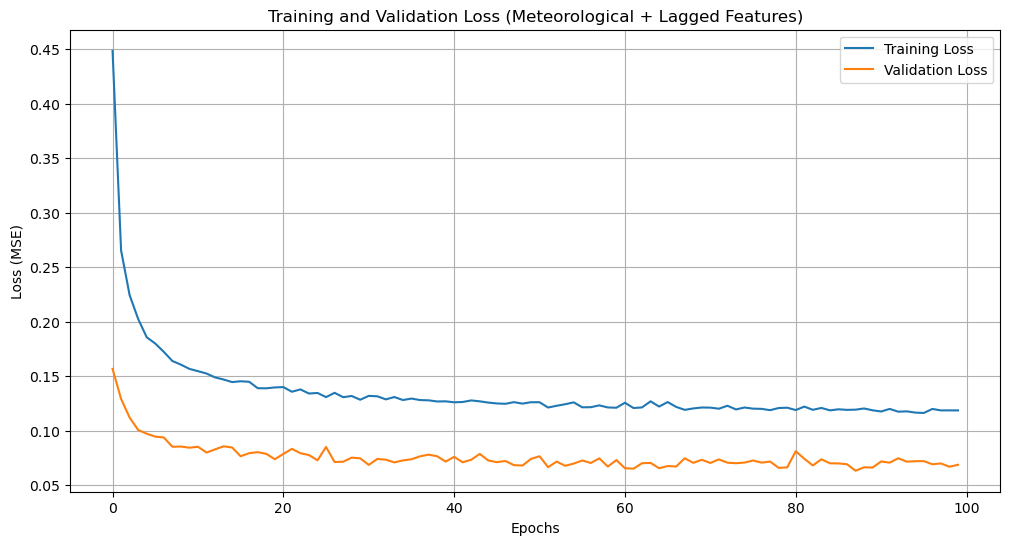

In [53]:

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (Meteorological + Lagged Features)')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.savefig(f"training_validation_loss.png", dpi=300, bbox_inches='tight')
plt.show()

## Step 9: Evaluation
### Evaluated the model on test data.
### Compared performance with a baseline linear regression model.
### Visualized training vs. validation loss.

In [55]:
# Evaluation 
# Evaluate the model on the test set
test_loss, test_mae = mlp_model_meteorology.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss (MSE): {test_loss}")
print(f"Test Mean Absolute Error (MAE): {test_mae}")

# Predict on the test set
y_pred = mlp_model_meteorology.predict(X_test)

# Calculate MSE and R-squared for each pollutant
rmse_per_pollutant = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values'))
r2_per_pollutant = r2_score(y_test, y_pred, multioutput='raw_values')

# Display metrics for each pollutant
print("\nPerformance Metrics (Test Set):")
for i, pollutant in enumerate(target_variables):
    print(f"{pollutant}: RMSE = {rmse_per_pollutant[i]:.4f}, R² = {r2_per_pollutant[i]:.4f}")


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0574 - mae: 0.1456
Test Loss (MSE): 0.055905841290950775
Test Mean Absolute Error (MAE): 0.14626185595989227
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Performance Metrics (Test Set):
PM2.5: RMSE = 0.2930, R² = 0.9094
CO: RMSE = 0.2108, R² = 0.9571
NO: RMSE = 0.1937, R² = 0.9654
NO2: RMSE = 0.2548, R² = 0.9382
O3: RMSE = 0.1862, R² = 0.9667
PM10: RMSE = 0.3163, R² = 0.9022
SO2: RMSE = 0.2042, R² = 0.9521
PB: RMSE = 0.1951, R² = 0.9627


In [56]:
# Train a Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [57]:
# Predict on the test set using the linear regression model
y_pred_baseline = linear_regressor.predict(X_test)


In [58]:
# Calculate MSE and R-squared for the baseline model
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_pred_baseline, multioutput='raw_values'))
baseline_r2 = r2_score(y_test, y_pred_baseline, multioutput='raw_values')

In [59]:
# Display baseline metrics for comparison
print("\nBaseline Model Performance (Linear Regression):")
for i, pollutant in enumerate(target_variables):
    print(f"{pollutant}: RMSE = {baseline_rmse[i]:.4f}, R² = {baseline_r2[i]:.4f}")


Baseline Model Performance (Linear Regression):
PM2.5: RMSE = 0.2777, R² = 0.9186
CO: RMSE = 0.1797, R² = 0.9688
NO: RMSE = 0.1648, R² = 0.9749
NO2: RMSE = 0.2461, R² = 0.9423
O3: RMSE = 0.1276, R² = 0.9843
PM10: RMSE = 0.3494, R² = 0.8807
SO2: RMSE = 0.1771, R² = 0.9640
PB: RMSE = 0.1765, R² = 0.9695


## Step 10: Feature Importance Analysis
### Calculated permutation importance to identify critical features.
### Visualized feature importance using a bar chart.

In [61]:
# Calculate permutation importance
result = permutation_importance(
    mlp_model_meteorology, 
    X_test, y_test, 
    n_repeats=10, random_state=42, scoring='neg_mean_squared_error'
)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
38/38 ━━━━━━━━━━━━━━━━━━━

In [62]:
# Summarize feature importance
importance = result.importances_mean
sorted_idx = np.argsort(importance)[::-1]
sorted_features = [input_features[i] for i in sorted_idx]

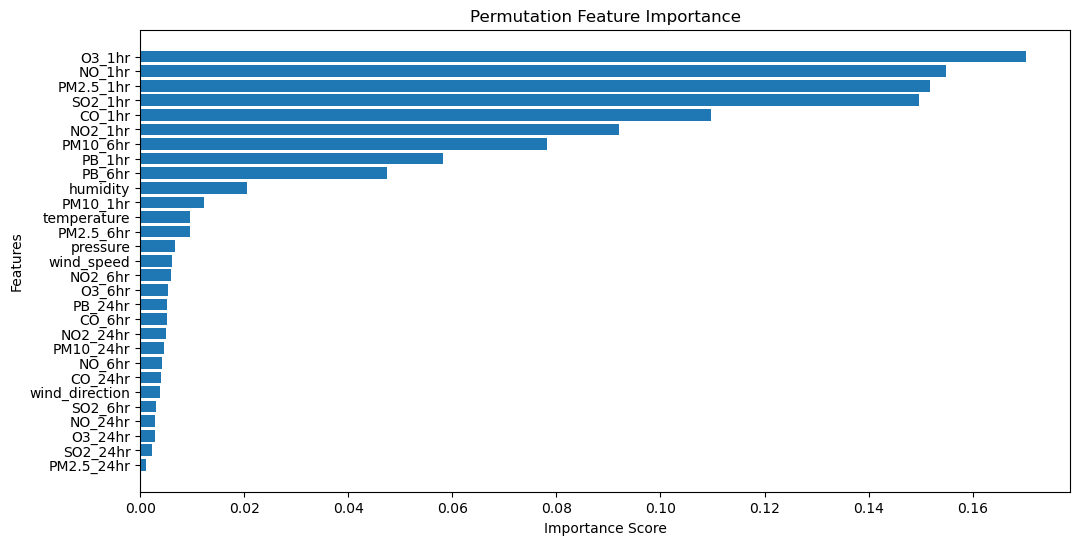

In [63]:
# Visualize feature importance
plt.figure(figsize=(12, 6))
plt.barh(sorted_features, importance[sorted_idx])
plt.title("Permutation Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.savefig(f"Feature_Importance.png", dpi=300, bbox_inches='tight')
plt.show()

## Step 11: Prediction Visualization
### Visualized predictions vs. actual values for each pollutant.

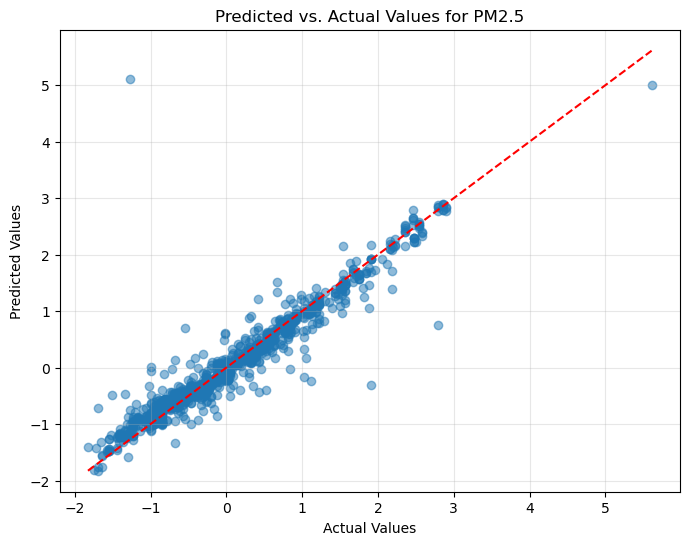

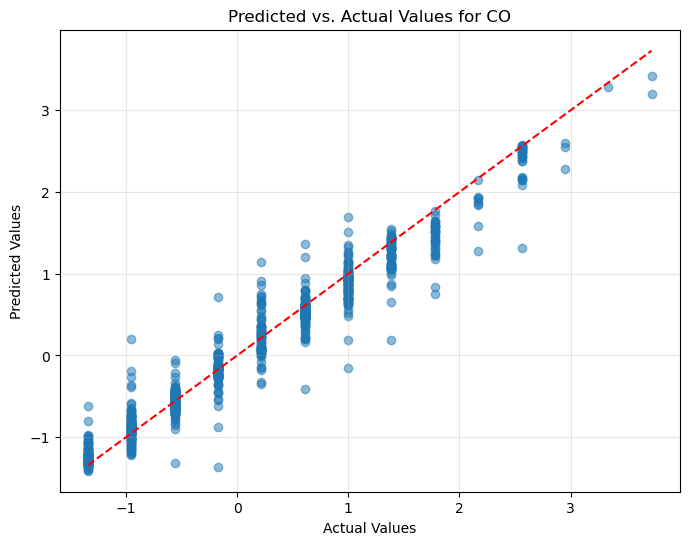

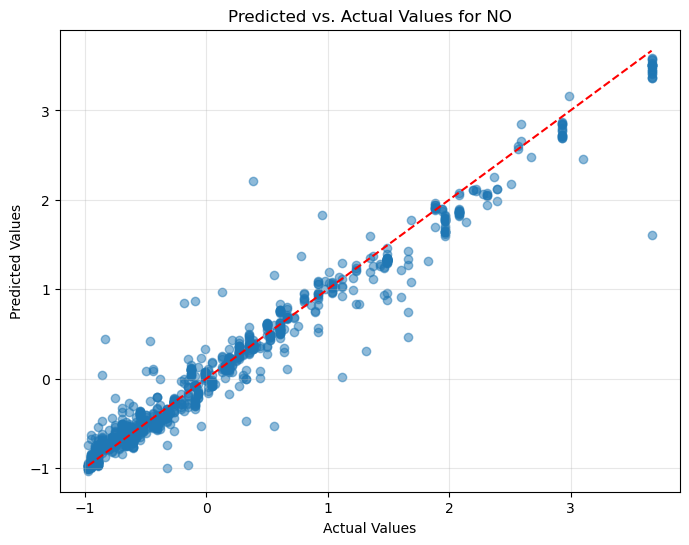

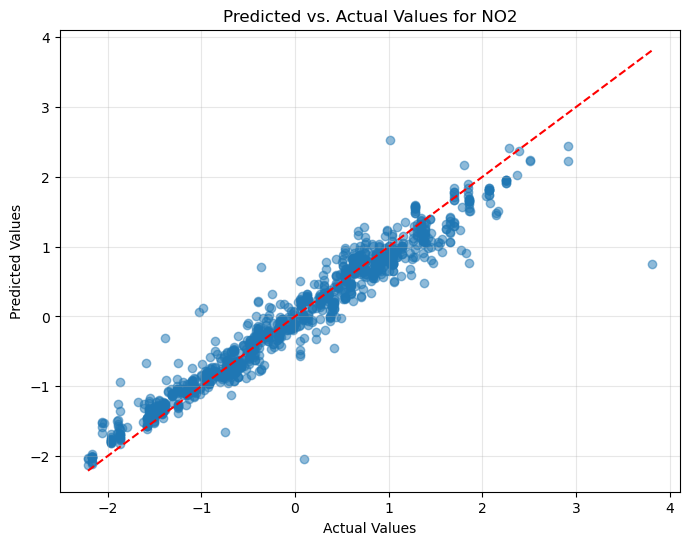

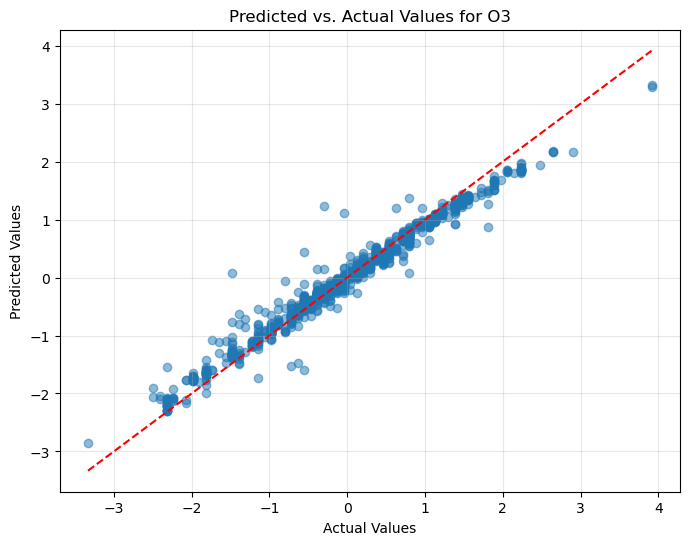

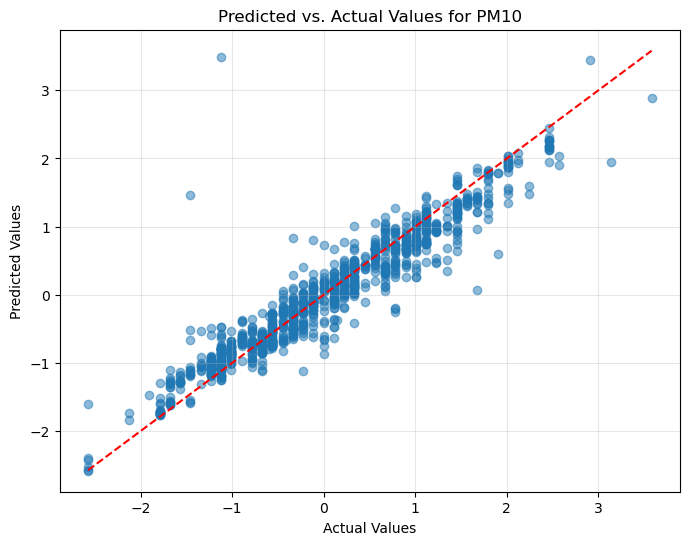

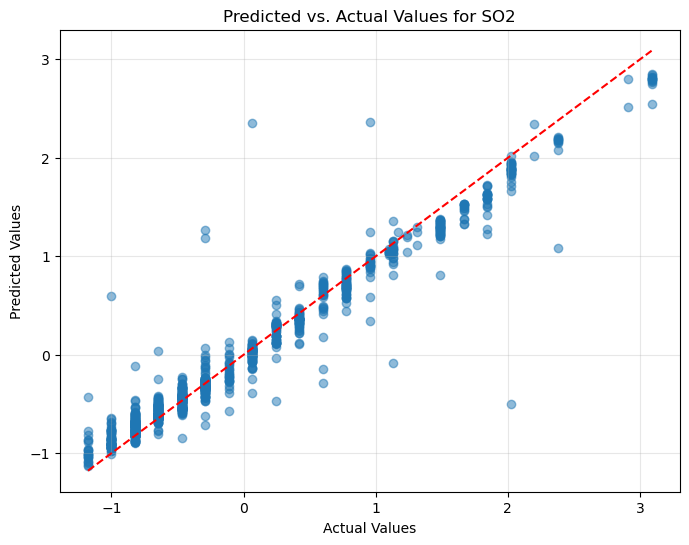

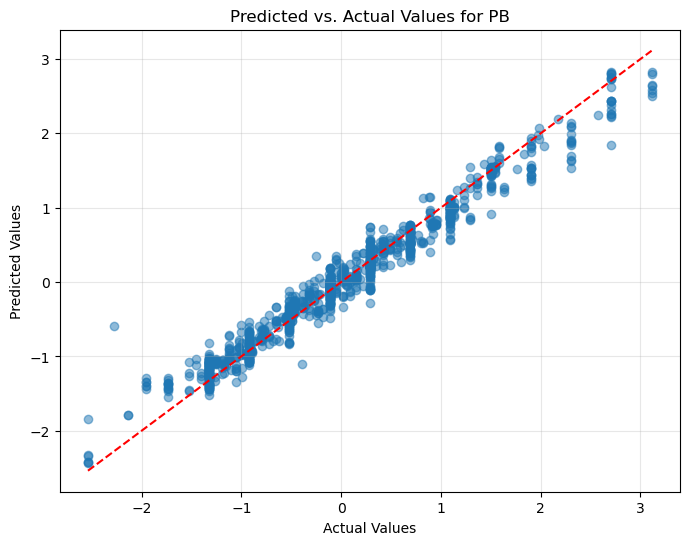

In [65]:
# predictions vs. actual values for each pollutant
for i, pollutant in enumerate(target_variables):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test[:, i], y_pred[:, i], alpha=0.5)
    plt.title(f"Predicted vs. Actual Values for {pollutant}")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.plot([y_test[:, i].min(), y_test[:, i].max()], 
             [y_test[:, i].min(), y_test[:, i].max()], 
             color='red', linestyle='--')  # Diagonal line for reference
    plt.grid(alpha=0.3)
    plt.show()
